<a href="https://colab.research.google.com/github/gabrielrflopes/estudos/blob/main/SpaceX_Falcon9_Launches_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_path = 'https://raw.githubusercontent.com/gabrielrflopes/estudos/main/datasets/SpaceX_Launches_Data.csv'

df_spx = pd.read_csv(data_path, delimiter = ',')

df_spx.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [3]:
df_spx.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
85,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,10,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,9,B1060,-80.577366,28.561857
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1062,-80.577366,28.561857


The dimensions of the dataset:

In [4]:
print('This dataset contains',
      '\nRows:', df_spx.shape[0],
      '\nVariables:', df_spx.shape[1])

This dataset contains 
Rows: 90 
Variables: 17


Let's explore the variables names using the columns method.

In [5]:
df_spx.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

THe types of the variables:

In [6]:
df_spx.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

Notice that `Date` is an object variable. We have to convert it to datetime,

In [7]:
df_spx['Date'] = pd.to_datetime(df_spx['Date'])

print(df_spx['Date'].dtypes)

datetime64[ns]


Now, let's explore for missing values

In [8]:
(df_spx.isna().sum() / df_spx.shape[0] * 100).sort_values(ascending = False).round(1)

LandingPad        28.9
FlightNumber       0.0
Reused             0.0
Longitude          0.0
Serial             0.0
ReusedCount        0.0
Block              0.0
Legs               0.0
GridFins           0.0
Date               0.0
Flights            0.0
Outcome            0.0
LaunchSite         0.0
Orbit              0.0
PayloadMass        0.0
BoosterVersion     0.0
Latitude           0.0
dtype: float64

As we can see, only the `LandingPad` variable has missing values. Let's look closer to this variable

In [9]:
df_spx['LandingPad'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: LandingPad, dtype: object

In [10]:
df_spx['LandingPad'].sample(20)

14                         NaN
55    5e9e3032383ecb6bb234e7ca
89    5e9e3032383ecb6bb234e7ca
18    5e9e3032383ecb6bb234e7ca
61    5e9e3033383ecbb9e534e7cc
7                          NaN
72                         NaN
43    5e9e3032383ecb267a34e7c7
4                          NaN
33    5e9e3033383ecbb9e534e7cc
88    5e9e3033383ecbb9e534e7cc
35    5e9e3032383ecb267a34e7c7
45                         NaN
86    5e9e3032383ecb6bb234e7ca
83    5e9e3032383ecb6bb234e7ca
70    5e9e3032383ecb6bb234e7ca
1                          NaN
16    5e9e3032383ecb267a34e7c7
22    5e9e3032383ecb267a34e7c7
82    5e9e3033383ecbb9e534e7cc
Name: LandingPad, dtype: object

`LandingPad` refers to the landing facilities used to recover components of SpaceX's VTVL reusable launch vehicles. Not all of the launches utilizes the launchpad, so it's understandable that some of the data is labeled as NaN in this case.

Let's look now at some statistical descriptions from the dataset.

In [11]:
df_spx.describe().round(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.00,90.00,90.00,90.0,90.00,90.00,90.00
mean,45.50,6123.55,1.79,3.5,2.79,-86.37,29.45
std,26.12,4732.12,1.21,1.6,3.44,14.15,2.14
min,1.00,350.00,1.00,1.0,0.00,-120.61,28.56
25%,23.25,2510.75,1.00,2.0,0.00,-80.60,28.56
50%,45.50,4701.50,1.00,4.0,1.00,-80.58,28.56
75%,67.75,8912.75,2.00,5.0,4.00,-80.58,28.61
max,90.00,15600.00,6.00,5.0,10.00,-80.58,34.63


In [12]:
df_spx[['BoosterVersion', 'Orbit', 'LaunchSite']].describe()

,BoosterVersion,Orbit,LaunchSite
count,90,90,90
unique,1,11,3
top,Falcon 9,GTO,CCSFS SLC 40
freq,90,27,55


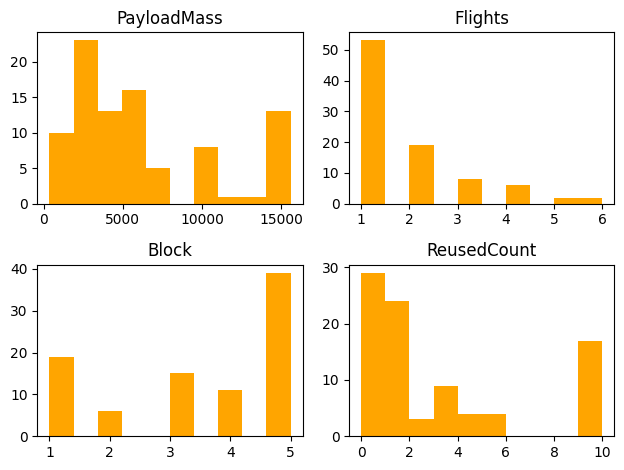

In [13]:
fig, ax = plt.subplots(2, 2)

df_spx[['PayloadMass', 'Flights', 'Block', 'ReusedCount']].hist(ax = ax, grid = False, color = 'orange')

fig.tight_layout()
fig.show()

Correlation matrix

In [14]:
corr = df_spx[['PayloadMass', 'Flights', 'ReusedCount', 'Block']].corr()

Text(0.5, 1.0, 'Correlation Matrix')

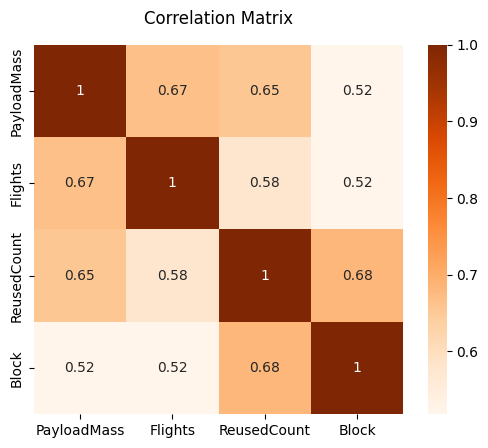

In [15]:
fig, ax = plt.subplots()

sns.heatmap(data = corr, square = True, annot = True, cmap = 'Oranges', cbar = True, ax = ax)

ax.set_title('Correlation Matrix', pad = 15)

<Axes: >

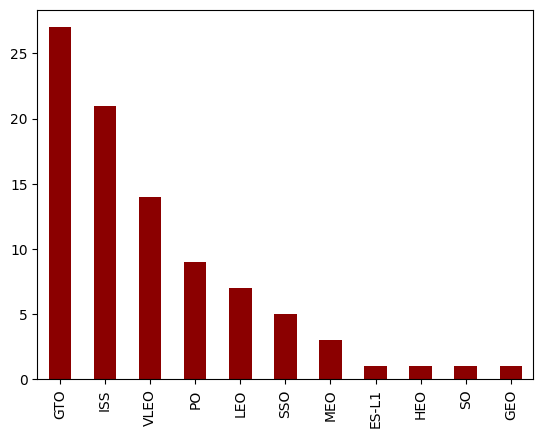

In [16]:
df_spx['Orbit'].value_counts().plot(kind = 'bar', color = 'darkred')

In [19]:
df_spx['PayloadMass'] = df_spx['PayloadMass'].astype('int64')

In [133]:
bins = np.linspace(df_spx['PayloadMass'].min(), df_spx['PayloadMass'].max(), 4)

print(bins)

group_names = ['Low mass', 'Medium mass', 'High mass']

[  350.          5433.33333333 10516.66666667 15600.        ]


In [134]:
df_spx['PayloadMassGroups'] = pd.cut(df_spx['PayloadMass'], bins, labels = group_names, include_lowest = True) 

df_spx[['PayloadMass', 'PayloadMassGroups']].head()

,PayloadMass,PayloadMassGroups
0,6123,Medium mass
1,525,Low mass
2,677,Low mass
3,500,Low mass
4,3170,Low mass


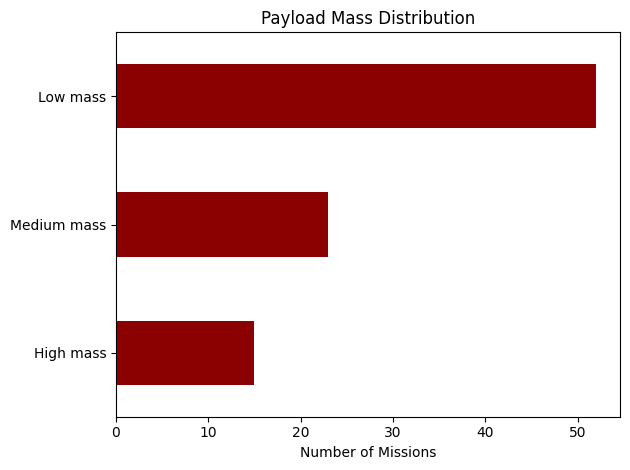

In [135]:
fig, ax = plt.subplots()

df_spx['PayloadMassGroups'].value_counts()[:-4:-1].plot(kind = 'barh', grid = False, ax = ax, color = 'darkred')

ax.set_title('Payload Mass Distribution')
ax.set_xlabel('Number of Missions')

fig.tight_layout()
fig.show()

### Distribution of payload mass on Falcon 9 for each orbit

In [136]:
y1 = df_spx.loc[df_spx['PayloadMassGroups'] == 'Low mass']['Orbit'].value_counts()

# dict1 = {'VLEO': 0, 'SO': 0, 'GEO': 0}
# s1 = pd.Series(data = dict1, index = dict1.keys())

# y1 = pd.concat([y1, s1], axis = 0).sort_index()

y1

ISS      19
GTO      17
SSO       5
LEO       4
MEO       3
PO        2
ES-L1     1
HEO       1
Name: Orbit, dtype: int64

In [137]:
y2 = df_spx.loc[df_spx['PayloadMassGroups'] == 'Medium mass']['Orbit'].value_counts()

y2

GTO    10
PO      7
LEO     3
SO      1
ISS     1
GEO     1
Name: Orbit, dtype: int64

In [138]:
y3 = df_spx.loc[df_spx['PayloadMassGroups'] == 'High mass']['Orbit'].value_counts()

y3

VLEO    14
ISS      1
Name: Orbit, dtype: int64

In [139]:
dict = {'index': ['GTO', 'ISS', 'VLEO', 'PO', 'LEO'],
        'y1': [17, 19, 0, 2, 4],
        'y2': [10, 1, 0, 7, 3],
        'y3': [0, 1, 14, 0, 0]}

df_mass_orbit = pd.DataFrame(dict)
df_mass_orbit.set_index('index', inplace = True)

df_mass_orbit

,y1,y2,y3
index,,,
GTO,17,10,0
ISS,19,1,1
VLEO,0,0,14
PO,2,7,0
LEO,4,3,0


In [47]:
x_orb = ['GTO', 'ISS', 'VLEO', 'PO', 'LEO']

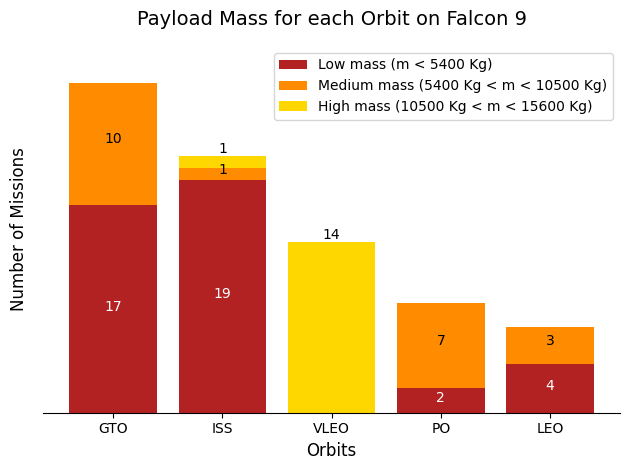

In [115]:
fig, ax = plt.subplots()

bars1 = ax.bar(x_orb, df_mass_orbit['y1'], color = 'firebrick', label = 'Low mass (m < 5400 Kg)')
bars2 = ax.bar(x_orb, df_mass_orbit['y2'], bottom = df_mass_orbit['y1'], color = 'darkorange', label = 'Medium mass (5400 Kg < m < 10500 Kg)')
bars3 = ax.bar(x_orb, df_mass_orbit['y3'], bottom = df_mass_orbit['y1'] + df_mass_orbit['y2'], color = 'gold', label = 'High mass (10500 Kg < m < 15600 Kg)')

ax.set_xlabel('Orbits', fontsize = 12)
ax.set_ylabel('Number of Missions', fontsize = 12)
ax.set_title('Payload Mass for each Orbit on Falcon 9', fontsize = 14, pad = 15)
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_yticklabels('')
ax.tick_params(left = False)
ax.set_ylim(0, 30)
ax.legend()

for bar1, bar2, bar3 in zip(bars1, bars2, bars3):

    height1 = bar1.get_height()
    height2 = bar2.get_height()
    height3 = bar3.get_height()

    total_height = height1 + height2 + height3

    if height1 > 0:
      ax.text(bar1.get_x() + bar1.get_width() / 2., height1 / 2 - 0.4, '%d' % int(height1), ha='center', va='bottom', color = 'white', fontweight = 530)
    if height2 > 0:
      ax.text(bar2.get_x() + bar2.get_width() / 2., height1 + height2 / 2 - 0.2, '%d' % int(height2), ha='center', va='bottom', fontweight = 530)
    if height3 > 0:
      ax.text(bar3.get_x() + bar3.get_width() / 2., total_height, '%d' % int(height3), ha='center', va='bottom', fontweight = 530)

fig.tight_layout()
fig.show()

plt.savefig('spacex_mass_orbit.png')

### Launch Site

<Axes: >

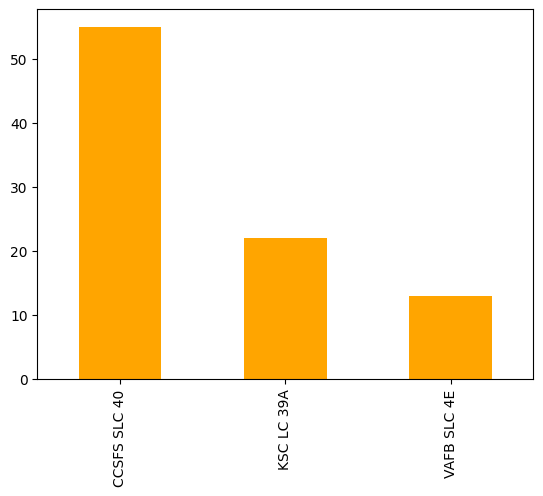

In [18]:
df_spx['LaunchSite'].value_counts().plot(kind = 'bar', color = 'orange')

In [28]:
df_spx.loc[df_spx['LaunchSite'] == 'VAFB SLC 4E'][['Latitude', 'Longitude']].iloc[0]

Latitude      34.632093
Longitude   -120.610829
Name: 3, dtype: float64

In [29]:
df_spx.loc[df_spx['LaunchSite'] == 'KSC LC 39A'][['Latitude', 'Longitude']].iloc[0]

Latitude     28.608058
Longitude   -80.603956
Name: 26, dtype: float64

In [30]:
df_spx.loc[df_spx['LaunchSite'] == 'CCSFS SLC 40'][['Latitude', 'Longitude']].iloc[0]

Latitude     28.561857
Longitude   -80.577366
Name: 0, dtype: float64

In [31]:
import folium 

usa = folium.Map(location = [28.5554521, -80.6090207], zoom_start = 10)

In [32]:
folium.Marker(location = [34.632093,  -120.610829]).add_to(usa)
folium.Marker(location = [28.608058, -80.603956]).add_to(usa)
folium.Marker(location = [28.561857, -80.577366]).add_to(usa)